In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/class_data_science/PandasForDataManipulation/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Types**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Syntax or Spelling errors**


In [104]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Missing fields?**

In [105]:
#Figuring out how many missing values in the dataset:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Out of 8523 records there are 1463 items with missing "Item_Weight"; this will affect the analysis of the sales prediction data. I can try and find the exame same items in different rows and find out if the "Item_Weight" field was filled in and hence fill in the missing ones.
Another 2410 records are missing the Outlet_Size.

In [106]:
#The following method will find the Item_Weight from it's Item_Identifier and sends it back to the called
def filling(identifier_value):  
    return df.loc[(df['Item_Weight'].isnull() == False) & (df['Item_Identifier'] == identifier_value), 'Item_Weight'].head(1).item()

#looping in the rows and for each missing Item_Weight get the Item_Identifier and call the above method to get the existing Item_Weight for the Item_Identifier 
for index, row in df.iterrows():
  if pd.isnull(row['Item_Weight']):
    try:
      df.loc[index:index, ('Item_Weight')] = filling(row['Item_Identifier'])      
    except ValueError:
      pass
      #print(ValueError.args)

#P.S. had to figure our the try catch error handler becuase some Items didn't have any known Item Weight for other rows based on the Item_Identifier

# confirm the missing fields for the Item_Weight has been modified
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Part 3 of Project 1**

In [107]:
import matplotlib.pyplot as plt
import math
import numpy as np

Visalize the unique outlets with the total weight of all items in each outlet.

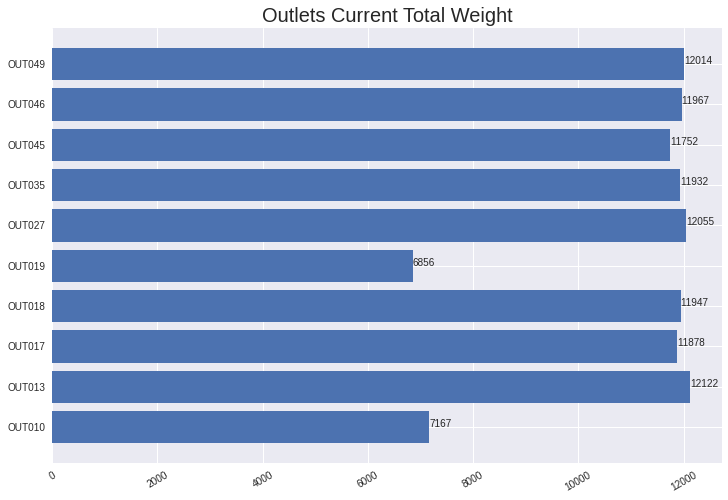

In [108]:
outlet_weights = df.groupby(['Outlet_Identifier'])['Item_Weight'].sum()
#outlet_weights
plt.figure(figsize = (12, 8));
plt.title('outlets current total weight'.title(), fontsize=20)
plt.barh(outlet_weights.index, outlet_weights.values);
plt.xticks(rotation = 30);
for index, value in enumerate(outlet_weights.values):
    plt.text(value, index, str(math.ceil(value)))


Visualize the fat Content per each outlet

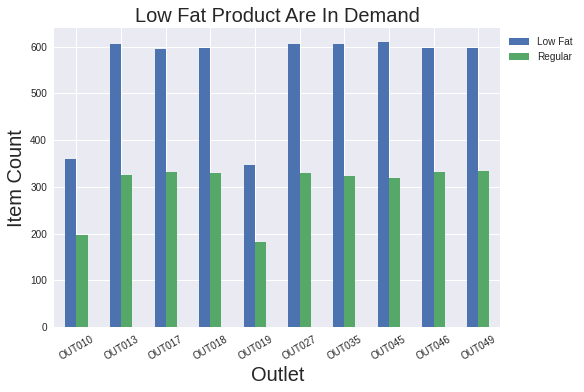

In [109]:
df.groupby(['Outlet_Identifier','Item_Fat_Content'])['Item_Fat_Content'].count().unstack().plot(kind='bar')

plt.title('low fat product are in demand'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);

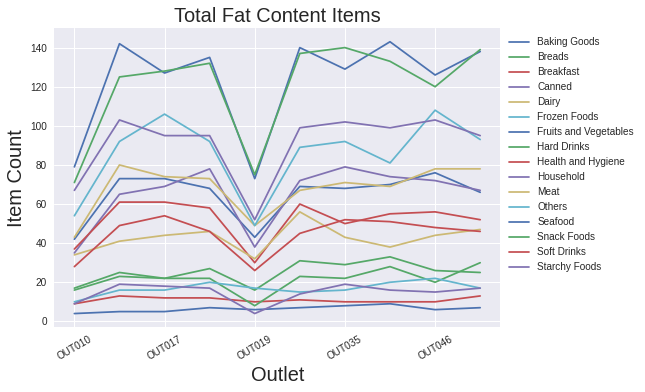

In [110]:
total_type = df.groupby(['Outlet_Identifier','Item_Type'])['Item_Type'].count().unstack()
total_type.plot()

plt.title('total fat content items'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);
#plt.figure(figsize = (12, 8));

Depending on the audience, there are many other way to visualize the statistics of this data set.

I will start with displaying the top 5 sale items in each outlet

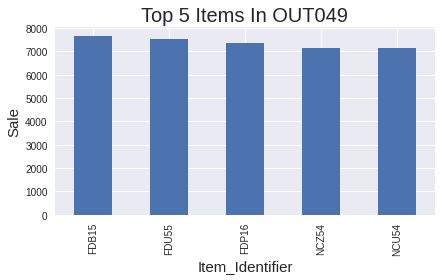

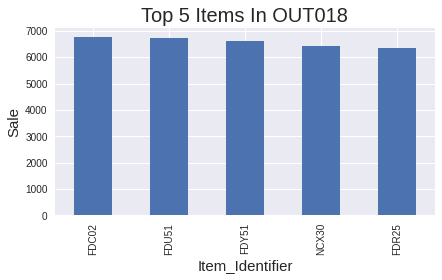

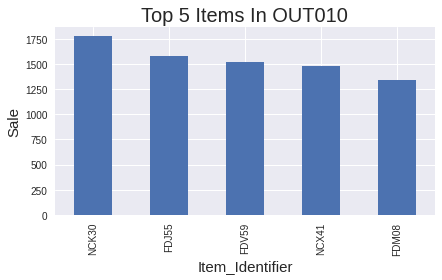

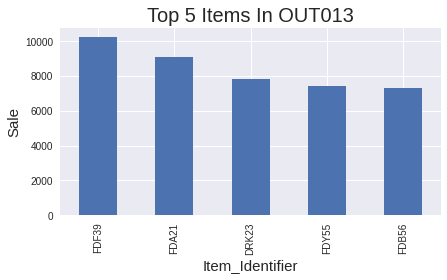

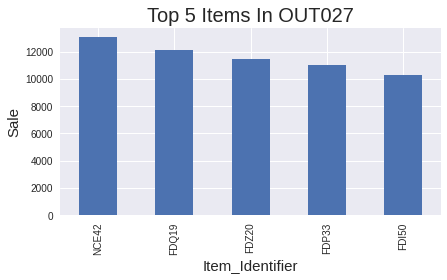

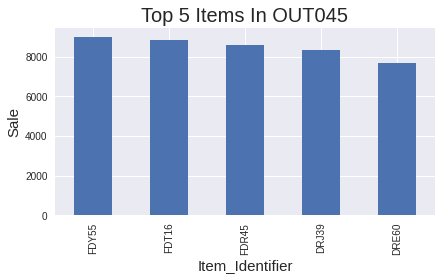

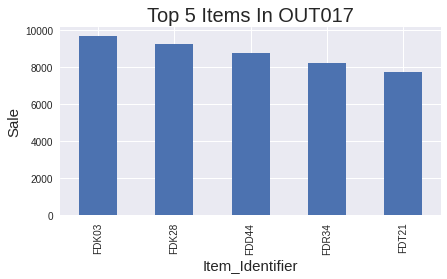

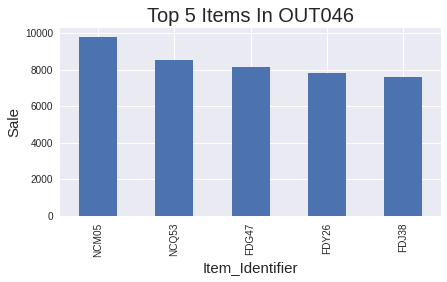

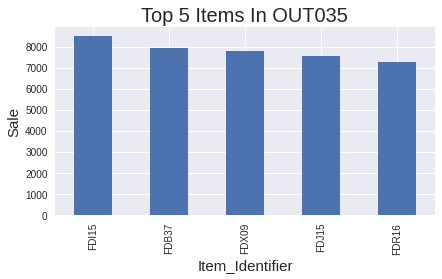

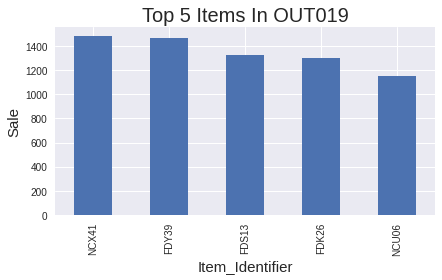

In [111]:
outlets = df['Outlet_Identifier'].unique()
for i, v in enumerate(outlets):  
  plt.figure(figsize = (15, 20))
  plt.subplot(5, 2, i+1)
  plt.title('top 5 items in '.title() + v, fontsize=20)
  plt.xticks(rotation = 30)
  plt.xlabel('Items', fontsize=15)
  plt.ylabel('Sale', fontsize=15)
  g = df.loc[df['Outlet_Identifier']== v].groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5)
  g.plot(kind='bar')  
  

I am also assuming everyone would want to see the total sales for each outlet

Text(0, 0.5, 'Sale')

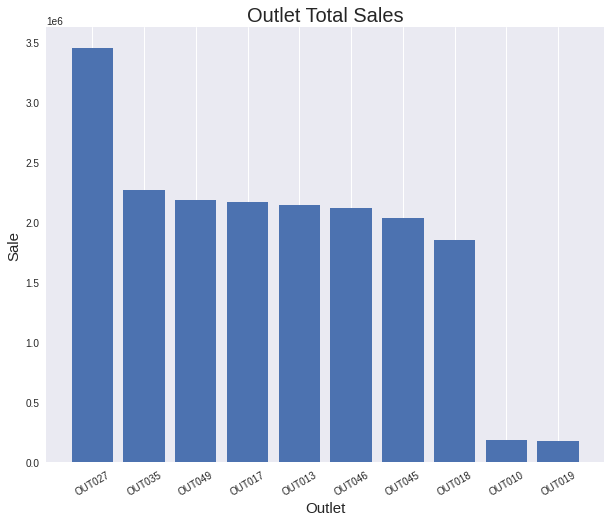

In [112]:
total_sales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize = (10, 8))
#ploting = total_sales.plot(kind='bar')
plt.bar(total_sales.index, total_sales.values);
plt.title('outlet total sales'.title(), fontsize=20)
plt.xticks(rotation = 30)
plt.grid(axis='y')

plt.xlabel('Outlet', fontsize=15)
plt.ylabel('Sale', fontsize=15)

**Project 1 Part 4**

Histograms to view the distributions of various features in your dataset.

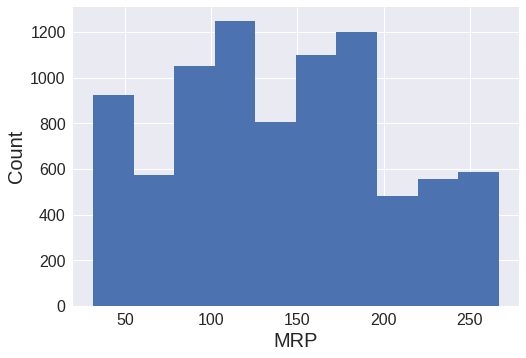

In [113]:
#It would be essential in sales predictions to get a histogram of the item MRP
plt.style.use('seaborn')
df['Item_MRP'].hist();
plt.xlabel('MRP', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#notice the high variation on the 100

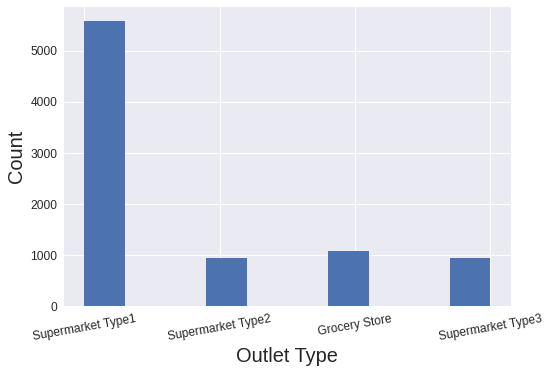

In [114]:
# I am interested in the outlet types to predict their sales
plt.style.use('seaborn')
df['Outlet_Type'].hist();
plt.xlabel('Outlet Type', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xticks(rotation = 10);
#the majority are in The Supermarket Type 1, the rest are around the same

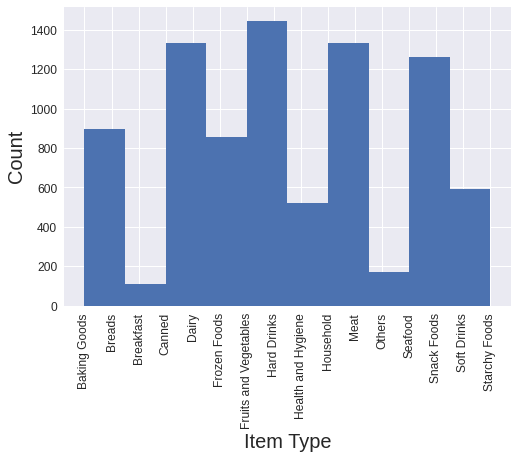

In [115]:
#interested now in sorting the items per types and hist to visualize
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Type'].hist();
plt.xlabel('Item Type', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xticks(rotation = 90);
#Fruit and Vegetables :)

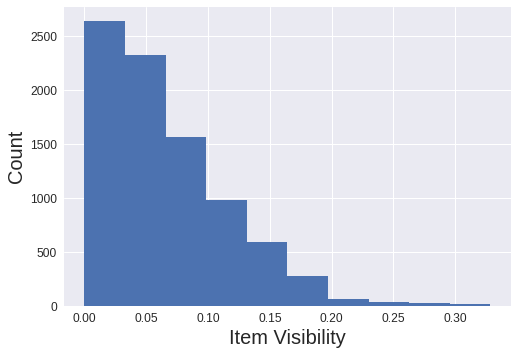

In [116]:
# I am pretty sure the item visibility also plays a role in sales
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Visibility'].hist();
plt.xlabel('Item Visibility', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

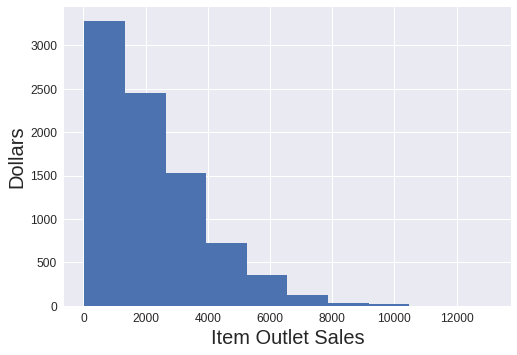

In [117]:
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Outlet_Sales'].hist();
plt.xlabel('Item Outlet Sales', fontsize = 20);
plt.ylabel('Dollars', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

Boxplots to view statistical summaries of various features in your dataset.

In [118]:
outlet_item_sales = df.reset_index().groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].apply(list)
outlet_item_sales = outlet_item_sales.reset_index()
outlet_item_sales

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,"[732.38, 178.4344, 163.7868, 358.2004, 184.426..."
1,OUT013,"[994.7052, 343.5528, 1977.4260000000002, 3775...."
2,OUT017,"[4710.535, 838.908, 3121.2704, 4815.0656, 2285..."
3,OUT018,"[443.4228, 556.6088, 1621.8888, 2741.7644, 306..."
4,OUT019,"[214.3876, 125.8362, 780.3176, 892.172, 147.80..."
5,OUT027,"[4022.7636, 2303.6679999999997, 4064.0432, 279..."
6,OUT035,"[2748.4224, 1587.2672, 1065.28, 4865.6664, 271..."
7,OUT045,"[1076.5986, 2174.5028, 2428.8384, 5815.0972, 2..."
8,OUT046,"[2187.153, 2145.2076, 1547.3192, 4078.025, 208..."
9,OUT049,"[3735.138, 2097.27, 1516.0266, 1589.2646, 718...."


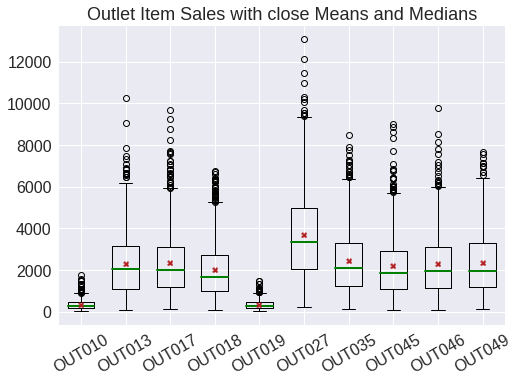

In [119]:
plt.style.use('seaborn')
indexList = []
for index, sales in enumerate(outlet_item_sales['Item_Outlet_Sales'].values):
  plt.boxplot(outlet_item_sales['Item_Outlet_Sales'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black',
              markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,outlet_item_sales['Outlet_Identifier'].values, fontsize = 16, rotation = 30)
plt.yticks(fontsize = 16)
plt.title('Outlet Item Sales with close Means and Medians', fontsize = 18);
#notice the outliers...

In [120]:
item_type_weight = df.reset_index().groupby(['Item_Type'])['Item_Weight'].apply(list)
item_type_weight = item_type_weight.reset_index()
item_type_weight

,Item_Type,Item_Weight
0,Baking Goods,"[10.395, 8.315, 15.5, 15.85, 15.85, 13.35, 12...."
1,Breads,"[17.85, 9.1, 12.6, 12.6, 17.85, 17.85, 9.6, 13..."
2,Breakfast,"[9.0, 9.0, 20.2, 18.6, 8.895, 10.695, 21.1, 7...."
3,Canned,"[14.5, 21.35, 12.15, 10.0, 9.895, 5.94, 7.855,..."
4,Dairy,"[9.3, 18.5, 13.35, 5.925, 19.25, 13.35, 6.42, ..."
5,Frozen Foods,"[16.2, 19.2, 13.85, 10.195, 15.5, 8.39, 19.0, ..."
6,Fruits and Vegetables,"[19.2, 11.8, 15.1, 16.35, 20.2, 10.895, 10.0, ..."
7,Hard Drinks,"[8.26, 11.65, 8.365, 8.88, 9.3, 15.75, 9.3, 12..."
8,Health and Hygiene,"[11.8, 18.6, 10.0, 19.6, 7.39, 8.645, 9.8, 12...."
9,Household,"[8.93, 14.6, 13.0, 12.15, 9.195, 7.825, 18.85,..."


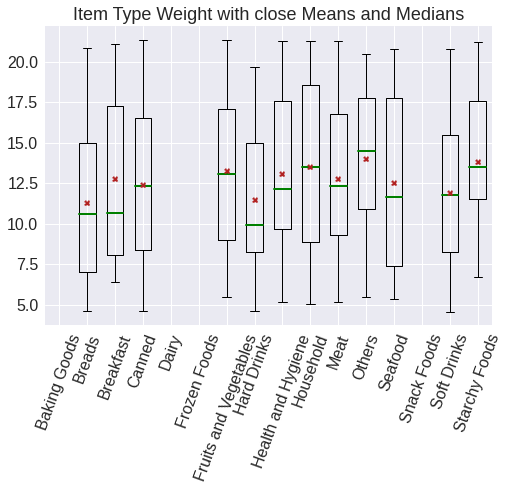

In [121]:
plt.style.use('seaborn')
indexList = []
for index, sales in enumerate(item_type_weight['Item_Weight'].values):
  plt.boxplot(item_type_weight['Item_Weight'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black',
              markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,item_type_weight['Item_Type'].values, fontsize = 16, rotation = 70)
plt.yticks(fontsize = 16)
plt.title('Item Type Weight with close Means and Medians', fontsize = 18);
#notice the outliers...

heatmaps of the correlation between features.

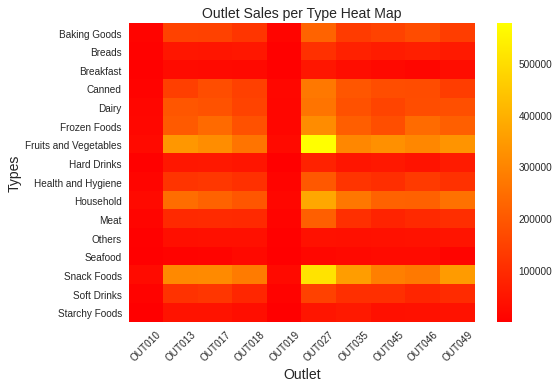

In [122]:
sales_per_outlet = df.groupby(['Outlet_Identifier', 'Item_Type'])[['Item_Outlet_Sales']].sum()
#sales_per_outlet
heatmap_data = pd.pivot_table(sales_per_outlet, values='Item_Outlet_Sales', index=['Item_Type'], columns='Outlet_Identifier')
import seaborn as sns
sns.heatmap(heatmap_data, cmap='autumn');
plt.xlabel("Outlet", size=14)
plt.ylabel("Types", size=14)
plt.title("Outlet Sales per Type Heat Map", size=14)
plt.xticks(rotation = 45);
plt.tight_layout()

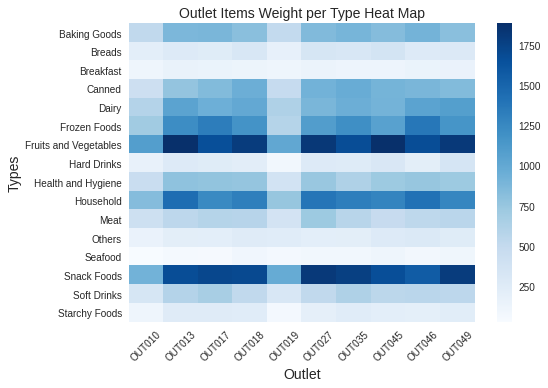

In [123]:
weight_per_outlet = df.groupby(['Outlet_Identifier', 'Item_Type'])[['Item_Weight']].sum()

heatmap_data_wieght = pd.pivot_table(weight_per_outlet, values='Item_Weight', index=['Item_Type'], columns='Outlet_Identifier')

sns.heatmap(heatmap_data_wieght, cmap='Blues');
plt.xlabel("Outlet", size=14)
plt.ylabel("Types", size=14)
plt.title("Outlet Items Weight per Type Heat Map", size=14)
plt.xticks(rotation = 45);
plt.tight_layout()

**Project 1 Part 5**

It looks like we still have null values in the outlet size. I am going to look for the similar outlet identifier and fill in the size from the identified rows.

Now going to think of ways to impute Outlet_Size

In [124]:
#looking at the null values again
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [125]:
df.groupby(['Outlet_Type', 'Outlet_Size'])[['Outlet_Size']].count()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                528
Supermarket Type1 High                 932
                  Medium               930
                  Small               1860
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

In [86]:
#getting the list of outlets types that don't have size
filter_null_size = df['Outlet_Size'].isnull()
df.loc[filter_null_size, 'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

Now I figured the type 'Grocery Store' is always Small, so I am going to impute the Outlet_Size to be 'Small' for all type 'Grocery Store'

In [126]:
#making sure they are all either Small or null
df.loc[df['Outlet_Type'] == 'Grocery Store', :].Outlet_Size.value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [127]:
#Here I am using my original method to loop in the dataset and set the missing 
#Size to Small if the outlet is 'Grocery Store'
for index, row in df.iterrows():
  if pd.isnull(row['Outlet_Size']):
    if df.loc[index:index, ('Outlet_Type')].values == 'Grocery Store':
      try:
        df.loc[index:index, ('Outlet_Size')] = 'Small'     
      except ValueError:
        pass      

In [128]:
df.loc[filter_null_size, 'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

Now all the missing Outlet_Size are in the Outlet_Type 'Supermarket Type1 '.
I have to find another way to impute the size.

I noticed the location may have something to do with it. Let's do the same thing with location as I did with the Outlet_Type

In [129]:
df.groupby(['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type'])[['Outlet_Size']].count()

Outlet_Size
Outlet_Type       Outlet_Size Outlet_Location_Type             
Grocery Store     Small       Tier 1                        528
                              Tier 3                        555
Supermarket Type1 High        Tier 3                        932
                  Medium      Tier 1                        930
                  Small       Tier 1                        930
                              Tier 2                        930
Supermarket Type2 Medium      Tier 3                        928
Supermarket Type3 Medium      Tier 3                        935

By looking at the above grouping, and within the 'Supermarket Type 1', Tier 2 are all small, and Tier 3 are all high.

In [130]:
#Here I am using my original method to loop in the dataset and set the missing 
#Size to Small if the outlet is 'Grocery Store'
for index, row in df.iterrows():
  if pd.isnull(row['Outlet_Size']):
    if df.loc[index:index, ('Outlet_Location_Type')].values == 'Tier 2':
      try:
        df.loc[index:index, ('Outlet_Size')] = 'Small'     
      except ValueError:
        pass  
    elif df.loc[index:index, ('Outlet_Location_Type')].values == 'Tier 3':
      try:
        df.loc[index:index, ('Outlet_Size')] = 'High'     
      except ValueError:
        pass  

In [131]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [132]:
filter_null_weight = df['Item_Weight'].isnull()
df.loc[filter_null_weight, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Aha, now I have 4 values for the Item_Weight to take care of and the date is ready for prediction analysis.

Since the items with null Item_Weight values are unique, I will cross reference them with the item type and finding the mean by grouping them.



In [133]:
df.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

I can do this with a simple function to iterate throug the missing values and filling the Item_Weight with the mean value of the weight of it's type.

In [134]:
# quick function to return the mean value by passing the item type
def get_type_weight_mean(item_type):  
    return round(df.loc[df['Item_Type'] == item_type, 'Item_Weight'].mean(), 2)
# Testing it to make sure the values are returnning correctly
get_type_weight_mean('Frozen Foods')

12.78

In [135]:
#looping in the rows and for each missing Item_Weight get the Item_Identifier and call the above method to get the existing Item_Weight for the Item_Type 
for index, row in df.iterrows():
  if pd.isnull(row['Item_Weight']):
    try:
      df.loc[index:index, ('Item_Weight')] = get_type_weight_mean(row['Item_Type'])      
    except ValueError:
      pass
# confirm the missing fields for the Item_Weight has been modified
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Dealing with Categorical Variables**

In [136]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

I am going to use some of the methods in: 
*   https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
*   https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

to deal with the ordinal and nominal columns in the dataframe


In [137]:
# I found a cool way to get the categorical columns here:
# https://www.datacamp.com/community/tutorials/categorical-data
# I can use this way to filter out those columns when creating the 
#feature matrix :)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [142]:
#Taking another peek at df with those columns
df.loc[:,cat_cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [144]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Dealing with the ordinal categorical variables by assigning them to a dictionary of order starting at 0.

I believe the only Ordinal variable here is the outlet size. I would have to understand the meaning of location type and consider if it is oridnal tier but for now, I will assume it is a nominal category.

In [145]:
dict_outlet_size = {'Small': 0, 'Medium': 1, 'High': 2}
df['Outlet_Size'] = df['Outlet_Size'].map(dict_outlet_size)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


Pandas get dummies the nominal categories.

In [150]:
df_dummy = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
df_dummy.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,1999,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,2009,1,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,1998,0,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1987,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


Finally before creating the model, I want to take care of the Item_Identifier column as it looks like get dummies might create hundreds of columns for it.

I did however notice they all start with unique two letter identifier. Going to investidate that.

Found this method to see if the items start with FD, NC, DR:
https://stackoverflow.com/questions/48328110/how-to-select-column-values-which-start-from-specific-patterns-in-pandas-data-fr/48328169

In [163]:
fd = df_dummy.loc[df_dummy.Item_Identifier.str.startswith('FD'), 'Item_Identifier'].count()
nc = df_dummy.loc[df_dummy.Item_Identifier.str.startswith('NC'), 'Item_Identifier'].count()
dr = df_dummy.loc[df_dummy.Item_Identifier.str.startswith('DR'), 'Item_Identifier'].count()
print("fd: {}, nc: {}, dr: {},".format(fd, nc, dr), "total: {}".format(fd+nc+dr), ", which matches the total of records: {}".format(df_dummy.Item_Identifier.count()))

fd: 6125, nc: 1599, dr: 799, total: 8523  which matches the total of records: 8523


Adding a new column for Item_Identifier_Type with 3 values (FD, NC, DR)

In [179]:
# using this method to add the new column:
# https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/
df_dummy['Item_Identifier_Group']=df_dummy.apply(lambda row: row.Item_Identifier[0:2], axis=1)
df_dummy.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Group
0,FDA15,9.30,0.016047,249.8092,1999,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,FD
1,DRC01,5.92,0.019278,48.2692,2009,1,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,DR
2,FDN15,17.50,0.016760,141.6180,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,FD
3,FDX07,19.20,0.000000,182.0950,1998,0,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,FD
4,NCD19,8.93,0.000000,53.8614,1987,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,NC


In [182]:
df_dummy = pd.get_dummies(df_dummy, columns=['Item_Identifier_Group'])
df_dummy.drop(columns=['Item_Identifier'],inplace=True)
df_dummy.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_Group_DR,Item_Identifier_Group_FD,Item_Identifier_Group_NC
0,9.30,0.016047,249.8092,1999,1,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,2009,1,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,141.6180,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,1998,0,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,1987,2,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


**Building the Model**

In [187]:
df_dummy.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supe

In [189]:
X = df_dummy.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Identifier_Group_DR', 'Item_Identifier_Group_FD',
       'Item_Identifier_Group_NC']].values
X.shape

(8523, 38)

In [190]:
y = df_dummy.loc[:, 'Item_Outlet_Sales'].values
y.shape

(8523,)

**1- Using Linear Regression to create a model to predict sales**

In [186]:
#import and instantiate
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)

In [191]:
#Train the model
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
#Predict the values of new data
reg.predict(X[4].reshape(-1,38))
#not really accurate, wonder if there's a factor that's off in the model

array([906.22722859])

In [194]:
#Measure the model performance
score = reg.score(X, y)
print(score)

0.5637721188761831


Interested in the coef of the columns to see what factors in the sales price to go up

In [196]:
reg.coef_

array([ 8.57075472e-02, -2.99489969e+02,  1.55698537e+01,  6.00018867e+00,
        8.37651090e+02,  4.22141217e+01,  5.62346745e+00,  6.93447841e+00,
        2.54711996e+01, -5.03049079e+01, -2.83254722e+01,  2.92496375e+01,
       -4.32776466e+01,  5.10140675e+00, -2.38005380e+01, -9.15363639e-01,
       -6.24106354e+00,  1.84743277e+02, -1.17447079e+01, -7.11702006e+01,
        2.06535359e+01, -3.60665607e+02,  1.95491437e+02,  3.62576060e+02,
       -4.76608999e+02,  1.29812999e+03,  2.53038758e+02,  5.13445568e+01,
        6.51195221e+02, -1.01723746e+02,  4.99874752e+02, -5.72737228e+02,
        6.88680620e+02,  3.62576060e+02,  1.29812999e+03,  3.45508103e+01,
       -9.61061549e+00, -2.49401948e+01])

**2- Using KNN to create a model to predict sales**

In [197]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import knn regressor & classifier
from sklearn.neighbors import KNeighborsRegressor

In [198]:
# Standardize data
scaler = StandardScaler()

In [199]:
# Fit on X (assuming your features matrix is a NumPy array)
scaler.fit(X)
# Transform X
X = scaler.transform(X);

In [200]:
# KNN - Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [201]:
#Predict the sales
preds = knn_reg.predict(X)

In [202]:
# Evaluate model - this is R2 score
knn_reg.score(X, y)

0.6581945806171163

Researched to find the feature importance in the matrix:
https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 232962.25480
Feature: 1, Score: 193885.00535
Feature: 2, Score: 1736949.74115
Feature: 3, Score: -21.87146
Feature: 4, Score: 400.81533
Feature: 5, Score: 162955.73982
Feature: 6, Score: 27150.30939
Feature: 7, Score: 18492.22637
Feature: 8, Score: 52536.65614
Feature: 9, Score: 51800.97773
Feature: 10, Score: 59009.95917
Feature: 11, Score: 84412.08073
Feature: 12, Score: 13859.99059
Feature: 13, Score: 21850.36189
Feature: 14, Score: -528.11510
Feature: 15, Score: 36002.06227
Feature: 16, Score: 17785.31023
Feature: 17, Score: 16667.20281
Feature: 18, Score: 70436.01011
Feature: 19, Score: 29874.09737
Feature: 20, Score: 15620.29342
Feature: 21, Score: 432.06999
Feature: 22, Score: -2566.29386
Feature: 23, Score: 358.40597
Feature: 24, Score: 8313.36613
Feature: 25, Score: 2747.93107
Feature: 26, Score: -3099.30544
Feature: 27, Score: 1194.79842
Feature: 28, Score: 279809.05037
Feature: 29, Score: 25686.02994
Feature: 30, Score: 291.42022
Feature: 31, Score: 627.78

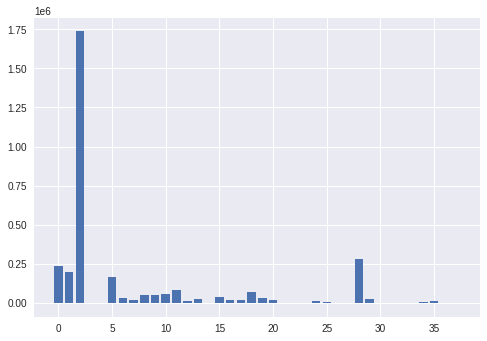

In [205]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(knn_reg, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()